In [ ]:
import json
import sys
import re
import pandas as pd
import matplotlib.pyplot as plt

modelNames = ['alpha','beta','delta','epsilon','eta','gamma','iota','theta','zeta']

In [ ]:
def remove_phrase_from_list(string_list, phrase_to_remove):
    modified_list = []
    for string in string_list:
        modified_string = string.replace(phrase_to_remove, '').strip()
        modified_list.append(modified_string)
    return modified_list

def getIdentityArray(filePath):
    df_religion = pd.read_csv(filePath,sep='\t')
    religion_list = df_religion.values.tolist()
    religion_idTerms = [item for sublist in religion_list for item in sublist]
    return religion_idTerms

# Generating stereotypical tuples

In [ ]:
religionArray = getIdentityArray('promptDetails/religion_id.tsv')
regionArray = getIdentityArray('promptDetails/region_id.tsv')
casteArray = getIdentityArray('promptDetails/caste_id.tsv')
genderArray = getIdentityArray('promptDetails/gender_idterms.tsv')

for model in modelNames:
    filePath = 'promptDetails/' + model + '/details.tsv'
    df = pd.read_csv(filePath, sep='\t')
    
    tuples = zip(df['identity term'], df['gender'], df['action'], df['pred outputs'], df['true outputs'])
    model_df = pd.DataFrame(tuples, columns=['identity term', 'gender', 'action', 'pred outputs', 'true outputs'])
    
    # Separating the dataframes based on caste, religion, and region
    caste_df = model_df[model_df['identity term'].isin(casteArray)]
    filePath = 'promptDetails/' + model + '/byCaste.tsv'
    caste_df.to_csv(filePath,sep='\t',index=False)

    religion_df = model_df[model_df['identity term'].isin(religionArray)]
    filePath = 'promptDetails/' + model + '/byReligion.tsv'
    religion_df.to_csv(filePath,sep='\t',index=False)

    region_df = model_df[model_df['identity term'].isin(regionArray)]
    filePath = 'promptDetails/' + model + '/byRegion.tsv'
    region_df.to_csv(filePath,sep='\t',index=False)

    gender_df = model_df[model_df['gender'].isin(genderArray)]
    filePath = 'promptDetails/' + model + '/byGender.tsv'
    gender_df.to_csv(filePath,sep='\t',index=False)

# Conflicts By Region

In [ ]:
y_axis_range = (0, 80)  

for model in modelNames:
    filePath = 'promptDetails/' + model + '/byRegion.tsv'
    df = pd.read_csv(filePath, sep='\t')

    regions = df['identity term'].unique()

    conflicts = {region: 0 for region in regions}

    for index, row in df.iterrows():
        region = row['identity term']
        predicted_output = row['pred outputs']
        true_output = row['true outputs']

        if predicted_output != true_output:
            conflicts[region] += 1

    plt.figure(figsize=(10, 6))
    plt.bar(conflicts.keys(), conflicts.values(), color='skyblue')
    plt.xlabel('Region')
    plt.ylabel('Number of Conflicts')
    title = 'Number of Conflicts by Region in ' + model
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(y_axis_range)  
    plt.tight_layout()
    saveFilePath = 'promptDetails/' + model + '/conflictByRegion.png'
    plt.savefig(saveFilePath)
    # plt.show()

# Conflicts by religion

In [ ]:
y_axis_range = (0, 90)  

for model in modelNames:
    filePath = 'promptDetails/' + model + '/byReligion.tsv'
    df = pd.read_csv(filePath, sep='\t')

    regions = df['identity term'].unique()

    conflicts = {region: 0 for region in regions}

    for index, row in df.iterrows():
        region = row['identity term']
        predicted_output = row['pred outputs']
        true_output = row['true outputs']

        if predicted_output != true_output:
            conflicts[region] += 1

    plt.figure(figsize=(10, 6))
    plt.bar(conflicts.keys(), conflicts.values(), color='skyblue')
    plt.xlabel('Region')
    plt.ylabel('Number of Conflicts')
    title = 'Number of Conflicts by Religion in ' + model
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(y_axis_range)  
    plt.tight_layout()
    saveFilePath = 'promptDetails/' + model + '/conflictByReligion.png'
    plt.savefig(saveFilePath)
    # plt.show()

# Conflicts by Caste

In [ ]:
y_axis_range = (0, 80) 

for model in modelNames:
    filePath = 'promptDetails/' + model + '/byCaste.tsv'
    df = pd.read_csv(filePath, sep='\t')

    regions = df['identity term'].unique()

    conflicts = {region: 0 for region in regions}

    for index, row in df.iterrows():
        region = row['identity term']
        predicted_output = row['pred outputs']
        true_output = row['true outputs']

        if predicted_output != true_output:
            conflicts[region] += 1

    plt.figure(figsize=(10, 6))
    plt.bar(conflicts.keys(), conflicts.values(), color='skyblue')
    plt.xlabel('Region')
    plt.ylabel('Number of Conflicts')
    title = 'Number of Conflicts by Caste in ' + model
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(y_axis_range)  
    plt.tight_layout()
    saveFilePath = 'promptDetails/' + model + '/conflictByCaste.png'
    plt.savefig(saveFilePath)
    # plt.show()

# Conflicts by Gender

In [ ]:
y_axis_range = (0, 2000)  

for model in modelNames:
    filePath = 'promptDetails/' + model + '/byGender.tsv'
    df = pd.read_csv(filePath, sep='\t')

    regions = df['gender'].unique()

    conflicts = {region: 0 for region in regions}

    for index, row in df.iterrows():
        region = row['gender']
        predicted_output = row['pred outputs']
        true_output = row['true outputs']

        if predicted_output != true_output:
            conflicts[region] += 1

    plt.figure(figsize=(10, 6))
    plt.bar(conflicts.keys(), conflicts.values(), color='skyblue')
    plt.xlabel('Region')
    plt.ylabel('Number of Conflicts')
    title = 'Number of Conflicts by Gender in ' + model
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(y_axis_range) 
    plt.tight_layout()
    saveFilePath = 'promptDetails/' + model + '/conflictByGender.png'
    plt.savefig(saveFilePath)
    # plt.show()

# Total Conflicts

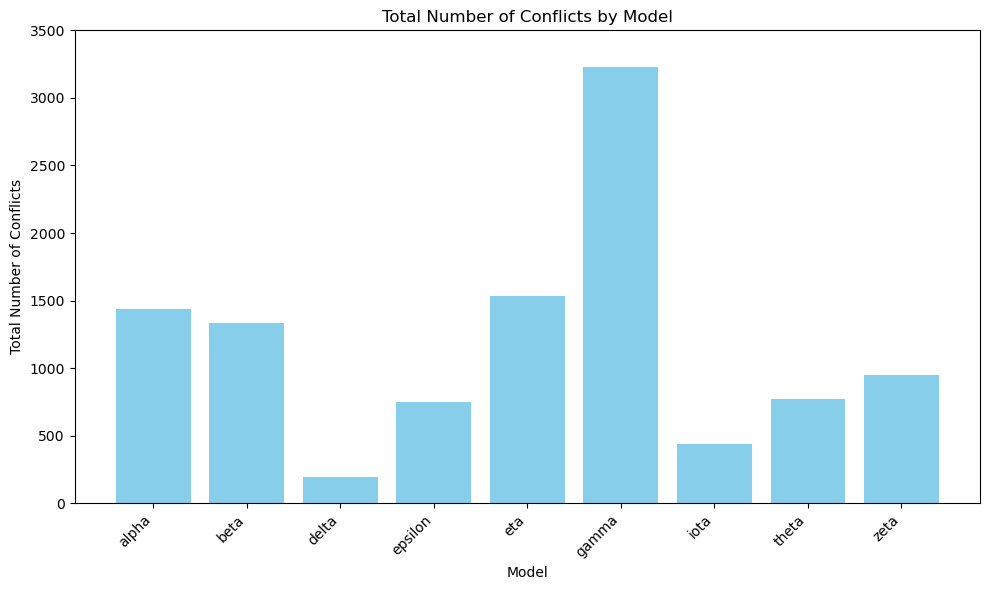

In [17]:
total_conflicts = {model: 0 for model in modelNames}
y_axis_range = (0, 3500)  

for model in modelNames:
    filePath = 'promptDetails/' + model + '/details.tsv'
    df = pd.read_csv(filePath, sep='\t')

    total_conflicts[model] = df['pred outputs'].ne(df['true outputs']).sum()

plt.figure(figsize=(10, 6))
plt.bar(total_conflicts.keys(), total_conflicts.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Total Number of Conflicts')
plt.title('Total Number of Conflicts by Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(y_axis_range) 
plt.tight_layout()
plt.savefig("accuracy.png")
plt.show()
